In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
import re

In [13]:
#! pip install nltk

In [14]:
#! pip install wordcloud

In [15]:
import nltk

In [16]:
reviews=pd.read_csv("K8 Reviews v0.2.csv")

In [17]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [18]:
reviews.shape

(14675, 2)

In [19]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [20]:
reviews.sentiment.value_counts(normalize=True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

In [21]:
# a user rating 1,2,3 -sentiment 0
# a user rating 4,5 - sentiment 1

In [22]:
count=0
for review in reviews.review.values:
    review=review.strip()
    

In [23]:
from wordcloud import WordCloud

In [24]:
reviews_combined=" ".join(reviews.review.values)

In [25]:
lst=["A","B","C"]
" ".join(lst)

'A B C'

In [26]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [27]:
word_cloud=WordCloud().generate(reviews_combined)

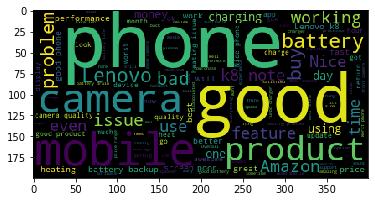

In [28]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [29]:
word_cloud=WordCloud(width=800,height =800,
                    background_color='white',
                    max_words=150).\
generate(reviews_combined)

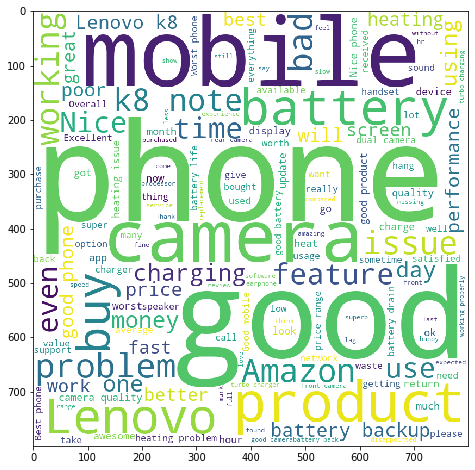

In [30]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [31]:
from nltk.probability import FreqDist
all_terms=reviews_combined.split(" ")
fdist=FreqDist(all_terms)

In [32]:
fdist

FreqDist({'is': 10151, 'the': 5565, 'not': 5162, 'and': 5078, 'phone': 4766, 'to': 4627, 'this': 3833, 'in': 3445, 'I': 3418, 'good': 3348, ...})

In [33]:
df_dist=pd.DataFrame(fdist.items(),columns=['words','freq'])

In [34]:
df_dist.head()

,words,freq
0,Good,1315
1,but,2222
2,need,196
3,updates,98
4,and,5078


In [35]:
df_dist.sort_values(ascending=False,by="freq").head(5)

,words,freq
13,is,10151
94,the,5565
41,not,5162
4,and,5078
91,phone,4766


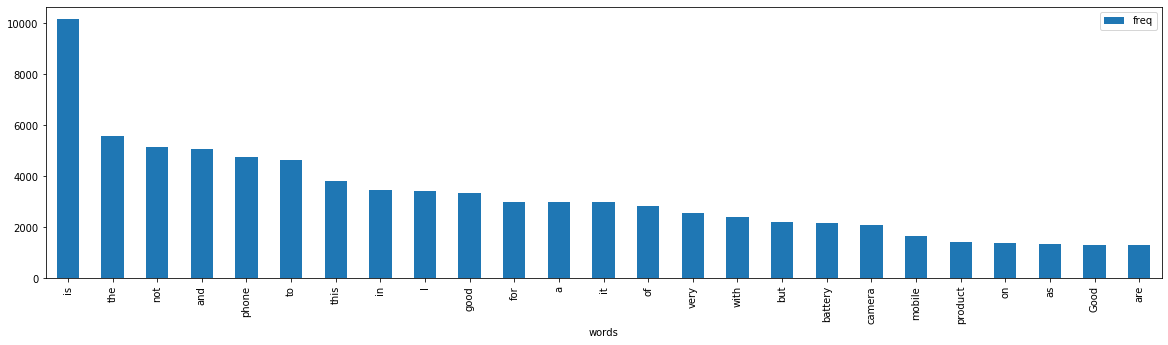

In [36]:
%matplotlib inline
df_dist.sort_values(ascending=False,by="freq").head(25).\
plot.bar(x="words",y="freq",figsize=(20,5))

# text cleaning

In [37]:
from nltk.tokenize import word_tokenize

In [38]:
all_terms=word_tokenize(reviews_combined.lower())

In [39]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [40]:
from nltk.probability import FreqDist
fdist=FreqDist(all_terms)

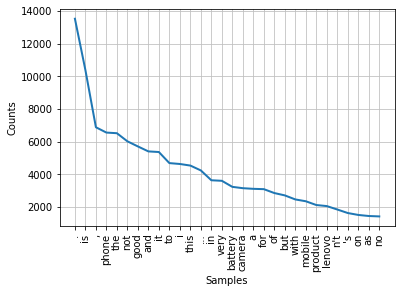

In [41]:
fdist.plot(30,cumulative=False)
plt.show()

In [42]:
# the head and tail of the above graph conisist of punctuation or stop words which needs to be removed

In [43]:
reviews_combined_clean=re.sub("[^\w\s]+","",reviews_combined)
all_terms=word_tokenize(reviews_combined_clean.lower())

In [44]:
len(set(all_terms))

18818

#### summary of tokenizers
    word tokenizer is a generic tokenizer which seperates words and punctuations,note aposthrophe is not considered as a punctuation
    tweet tokenizer is specificially used while dealing with social media text consisting of #,@ and emotions
    regex_p tokenizer is used when we are interested in few-specific words,which follows a specific patern like extracting hashtags,hyper links,addresses(@)

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from string import punctuation

In [47]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [48]:
from nltk.corpus import stopwords

In [49]:
stop_nltk=stopwords.words('english')
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [50]:
txt="I am not able to work today,I will be taking off"

In [51]:
clean_word=[word for word in word_tokenize(txt.lower()) \
if word not in list(punctuation) and word not in stop_nltk]

In [52]:
clean_word

['able', 'work', 'today', 'taking']

In [53]:
stop_updated=stop_nltk+['mobile','phone','lenovo','k8','note']

In [54]:
all_terms1=[term for term in all_terms if term not in stop_updated and len(term)>2]

In [55]:
len(set(all_terms1))

18297

In [56]:
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()

In [57]:
reviews_updated_lemm=[lemm.lemmatize(word) for word in all_terms1]

In [58]:
print(len(set(reviews_updated_lemm)))

17707


In [59]:
reviews_updated_stem=[stemmer_s.stem(word) for word in all_terms1]

NameError: name 'stemmer_s' is not defined

In [ ]:
print(len(set(reviews_updated_stem)))

In [ ]:
from nltk.stem import PorterStemmer,SnowballStemmer

In [ ]:
stemmer_p=PorterStemmer()

In [ ]:
stemmer_s=SnowballStemmer(language='english')

In [ ]:
words=['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+'-->'+stemmer_p.stem(word))

In [ ]:
for word in words:
    print(word+'-->'+stemmer_s.stem(word))

In [ ]:
sentence="Pythoners are very Intelligent and work very pythonly and now they are pythoning their way to success"

In [ ]:
print([stemmer_p.stem(word) for word in word_tokenize(sentence.lower())])

In [ ]:
print([stemmer_s.stem(word) for word in word_tokenize(sentence.lower())])

In [ ]:
text="I mustered all my drive and drove to driving school"

In [ ]:
print([stemmer_p.stem(word) for word in word_tokenize(text.lower())])

In [ ]:
print([stemmer_s.stem(word) for word in word_tokenize(text.lower())])

In [ ]:
nltk.download('wordnet')

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemm=WordNetLemmatizer()

In [ ]:
text="He was running and eating at same time"

In [ ]:
print([lemm.lemmatize(word) for word in word_tokenize(text.lower())])

In [ ]:
## specifying the context of the word -its pos

In [ ]:
print([lemm.lemmatize(word,pos='n') for word in word_tokenize(text.lower())])

In [ ]:
text="He has bad habit of swimming after playing long hours in the sun"

In [ ]:
print([lemm.lemmatize(word,pos='n') for word in word_tokenize(text.lower())])

In [ ]:
print([lemm.lemmatize(word,pos='v') for word in word_tokenize(text.lower())])

In [ ]:
words=['charging','charged','charges']
len(set([lemm.lemmatize(word,pos='n') for word in words]))

In [ ]:
len(set([lemm.lemmatize(word,pos='v') for word in words]))

In [ ]:
len(set([stemmer_s.stem(word) for word in words]))

In [ ]:
len(set(all_terms1))

In [ ]:
all_terms1_stemmed=[stemmer_s.stem(word) for word in all_terms1]

In [ ]:
print(len(set(all_terms1_stemmed)))

In [ ]:
all_terms1_lemm=[lemm.lemmatize(word) for word in all_terms1]

In [ ]:
print(len(set(all_terms1_lemm)))

In [ ]:
def clean_text(sent):
    
# stripping white spaces before and after the text
    sent=sent.strip()
    # replacing multiple spaces with a single space
    result=re.sub("\s+"," ",sent)
    # replacing non alpha numeric and non space characters with nothing
    result1=re.sub("[^\w\s]","",result)
    #normalize case,stem and remove shorter tokens
    tokens=word_tokenize(result1.lower())
    stemmed=[stemmer_s.stem(term) for term in tokens\
            if term not in stop_updated\
            and len(term)>2]
    # join all to form a single string which will be returned from the udf
    res=" ".join(stemmed)
    return res
    
        

In [ ]:
reviews['clean_review']=reviews.review.apply(clean_text)

In [ ]:
reviews

#### ### plot the bar graph for top 25 frequencies used bigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# create a bigram count vectorizer object
bigram_count_vectorizer=CountVectorizer(ngram_range=(2,2),max_features=150)

In [ ]:
X_bigram=bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# creating a DTM
DTM_bigram=pd.DataFrame(X_bigram.toarray(),columns=bigram_count_vectorizer.get_feature_names())

In [ ]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect=TfidfVectorizer()

In [ ]:
X=tfidf_vect.fit_transform(reviews['clean_review'])

In [ ]:
tfidf=pd.DataFrame(X.toarray(),columns=tfidf_vect.get_feature_names())
tfidf

In [ ]:
tfidf_vect=TfidfVectorizer(smooth_idf=True,norm=False)

In [ ]:
x=tfidf_vect.fit_transform(reviews['clean_review'])

In [ ]:
tfidf=pd.DataFrame(x.toarray(),columns=tfidf_vect.get_feature_names())
tfidf

In [ ]:
## task


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(2,2),max_features=7000,norm=False)
X=tfidf.fit_transform(reviews['clean_review'])
df=pd.DataFrame(X.toarray(),columns=tfidf.get_feature_names())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(2,2),max_features=3000)
X=tfidf.fit_transform(reviews['clean_review'])
df1=pd.DataFrame(X.toarray(),columns=tfidf.get_feature_names())

In [ ]:
bat_drain=df['batteri drain'].sort_values(ascending=False).head(5)
reqoutput=reviews[reviews.index.isin(bat_drain.index)]
reqoutput

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

In [ ]:
def clean_txt_new(sent):
    tokens=word_

In [ ]:
reviews.head()

### sentiment prediction strategy 1: building our own model based on the sentiment labels

In [60]:
# Applying supervised learning on the labelled data-In this case we will leverage the sentiment label which is available along with the text data

### steps:
    -step1:get x and y
    -step2:converting text to numbers(countvectorizer or tfidfvectorizer
    -step3:split into test and train
    -step4:train the model
    -step5:test and get the accuracy scores
    -step6:make prediction for input review

In [61]:
X_text=reviews.clean_review.values
Y=reviews.sentiment.values

AttributeError: 'DataFrame' object has no attribute 'clean_review'

In [ ]:
count_vect=CountVectorizer(max_features=3500)
X=count_vect.fit_transform(X_text)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [63]:
log_reg.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [64]:
y_pred=log_reg.predict(x_test)

NameError: name 'x_test' is not defined

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [65]:
accuracy_score(y_test,y_pred)

NameError: name 'accuracy_score' is not defined

In [ ]:
# make prediction
review1="This is a fantasti mobile really like it but the battery drains fast"
review2="Camera is good but when i speak phone continuosly over long time it gets\heated up"

In [66]:
review=[review1,review2]

NameError: name 'review1' is not defined

In [67]:
c_review=list(map(clean_text,review))

NameError: name 'clean_text' is not defined

In [68]:
x_test_new=count_vect.transform(c_review)

NameError: name 'count_vect' is not defined

In [ ]:
y_test_pred_new=log_reg.predict(x_test_new)

In [69]:
y_test_pred_new

NameError: name 'y_test_pred_new' is not defined

In [70]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [71]:
y_test_pred=nb.predict(x_test)
accuracy_score(y_test,y_test_pred)
y_test_pred_new=nb.predict(x_test_new)
y_test_pred_new

NameError: name 'x_test' is not defined

In [72]:
### sentiment analysis

In [73]:
afinn=pd.read_csv("AFINN-111.txt",sep="\t",header=None)
afinn.columns=['Term','Score']
term_score=dict(afinn.values)

In [74]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_score.get(term,0)
    return score

In [75]:
reviews['sent_score']=reviews.clean_review.apply(get_sentiment)

AttributeError: 'DataFrame' object has no attribute 'clean_review'

In [76]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [77]:
reviews['sent_prediction']=\
reviews.sent_score.apply(lambda x:1 if x>0 else 0)

AttributeError: 'DataFrame' object has no attribute 'sent_score'

In [78]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [80]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

AttributeError: 'DataFrame' object has no attribute 'sent_prediction'

In [81]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction)

AttributeError: 'DataFrame' object has no attribute 'sent_prediction'

In [82]:
### model building without stemming and lemmatization

In [83]:
def clean_txt_new(sent):
    
# stripping white spaces before and after the text
    sent=sent.strip()
    # replacing multiple spaces with a single space
    result=re.sub("\s+"," ",sent)
    # replacing non alpha numeric and non space characters with nothing
    result1=re.sub("[^\w\s]","",result)
    #normalize case,stem and remove shorter tokens
    tokens=word_tokenize(result1.lower())
    token_new=[(term) for term in tokens \
              if term not in stop_updated and \
              len(term)>2]
    
    # join all to form a single string which will be returned from the udf
    res=" ".join(token_new)
    return res

In [84]:
reviews['clean_review_unstemmed']=reviews.review.apply(clean_txt_new)

In [85]:
## AFINN prediction by setting the threshold to 0

In [86]:
reviews['sent_prediction']=\
reviews.sent_score.apply(lambda x:1 if x>0 else 0)

AttributeError: 'DataFrame' object has no attribute 'sent_score'

In [ ]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

In [ ]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction)

In [ ]:
## setting threshold to 2
reviews['sent_prediction']=\
reviews.sent_score.apply(lambda x:1 if x>=2 else 0)
accuracy_score(reviews.sentiment,reviews.sent_prediction)

### sentiment prediction strategy 2 : vader

### V*alence *Aware D*ictionary and sEntiment *Reasoner

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
analyser=SentimentIntensityAnalyzer()

In [4]:
analyser.polarity_scores("the food is great")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

### compound scores are the final sentiment scores from vader in the range +1 to -1.These are normalized sentiment scores.
    - any score close to +1 means it has more positive sentiment in the sentence
    - any score close to -1 means it has more negative sentiment in the sentence
    - any score close to 0 means the sentence is neutral
    -vader doesnt understand about sarcasm
   - the outcome of ploarity_scores will also tell you the % of neutrality,negativity and positivity of a sentence


In [5]:
analyser.polarity_scores("the food is terrible")

{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

In [6]:
analyser.polarity_scores("the food is Good")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [7]:
analyser.polarity_scores("the food is good!")

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}

In [8]:
analyser.polarity_scores("heard the news")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [9]:
analyser.polarity_scores("the food is great :")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [92]:
## sarcasm
analyser.polarity_scores("I love tea.I hate coffee")


{'neg': 0.374, 'neu': 0.202, 'pos': 0.424, 'compound': 0.128}

In [102]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)[compound]

In [103]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [104]:
reviews['sent_score_vader']=reviews.review.apply(get_vader_sentiment)

In [105]:
reviews['sent_prediction_vader']=reviews.sent_score_vader.apply(lambda x:1 if x>0.3 else 0)

In [107]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7990459965928449